# Lab 2: Plotting with matplotlib and Big-O

Lecturer: <code>Sirasit Lochanachit</code>

Course:

<code>01526102 Data Sturctures and Algorithms [SIIE]\
    06036120 Data Structures and Algorithms Principles [BIT]
</code>

Term: <code>01/2024</code>

---


# Required Libraries

- pip install numpy
- pip install matplotlib

In [ ]:
import time
import timeit
import math
import random
import numpy as np
import matplotlib.pyplot as plt

---

## 1. Drawing plots with `matplotlib`

The [matplotlib library](https://matplotlib.org) supports the creation of all sorts of visualizations. We will use it for drawing simple 2-dimensional plots.

The primary plotting function we will use is `matplotlib.pyplot.plot` ([full documentation here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)), which, when passed two "array-like" objects of equal length, will interpret and plot their contents as x and y axis coordinates. We will generally use tuples, lists, and ranges as array-like objects. Note that generators are *not* considered array-like by matplotlib.

Some examples (note that we use a semicolon after the call to `plot` to hide its return value):

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline
# setting plot size
plt.rcParams['figure.figsize'] = [10, 6] # [wide, tall]

`plt.plot()` is used to create a 2D line plot

- The first list [1, 2, 3, 4, 5] represents the x-coordinates.
- The second list [50, 20, 30, 10, 40] represents the y-coordinates.

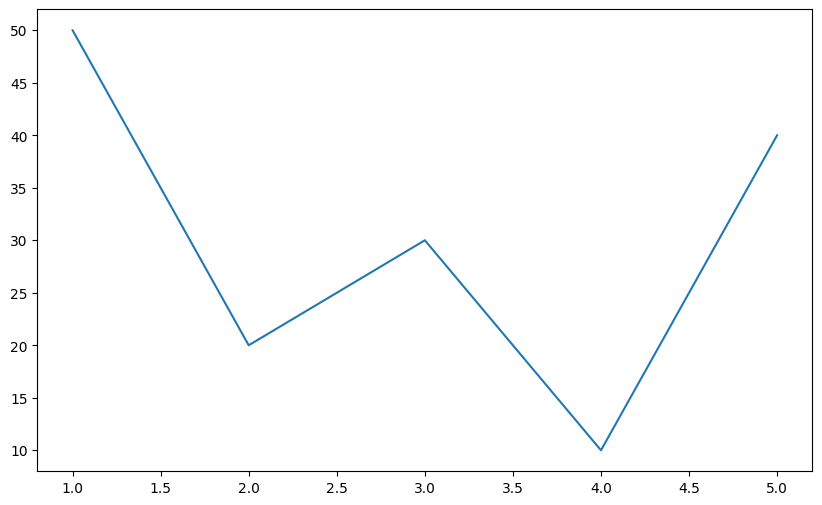

In [ ]:
plt.plot([1, 2, 3, 4, 5], [50, 20, 30, 10, 40]);

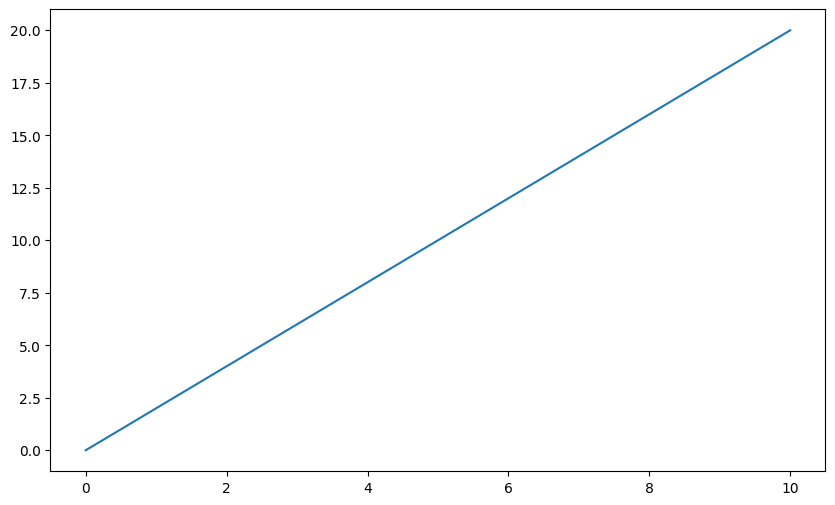

In [ ]:
xs = range(11)
ys = [x*2 for x in xs]
plt.plot(xs, ys);

**Explanation**

`range(11)` generates numbers from 0 to 10

If `xs = [0, 1, 2, ..., 10]`, then `ys = [0*2, 1*2, 2*2, ..., 10*2]`.


We can also provide an optional format string to `plot`, which controls marker, line-style, and color for the plot.

Here's a shortened list of options copied from the [full documentation of `plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot):

**Markers**

  - `.` : point marker
  - `o` : circle marker
  - `s` : square marker
  - `d` : diamond marker

**Line-styles**

  - `-` : solid line style
  - `--` : dashed line style
  - `:` : dotted line style

**Colors**

  - `k` : black
  - `r` : red
  - `b` : blue
  - `g` : green
  - `y` : yellow
  - `c` : cyan
  
Here are the above plots with some color and styling:

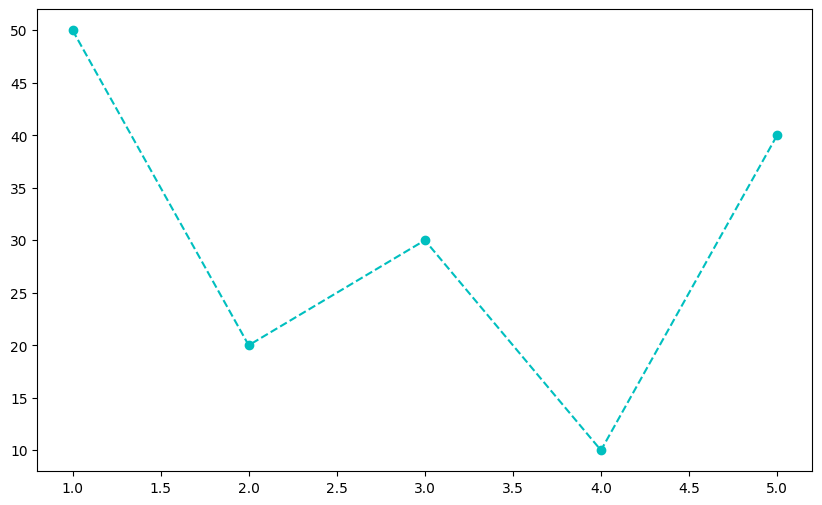

In [ ]:
plt.plot([1, 2, 3, 4, 5], [50, 20, 30, 10, 40], 'o--c');

If we omit a line style, no connecting line is drawn between data points

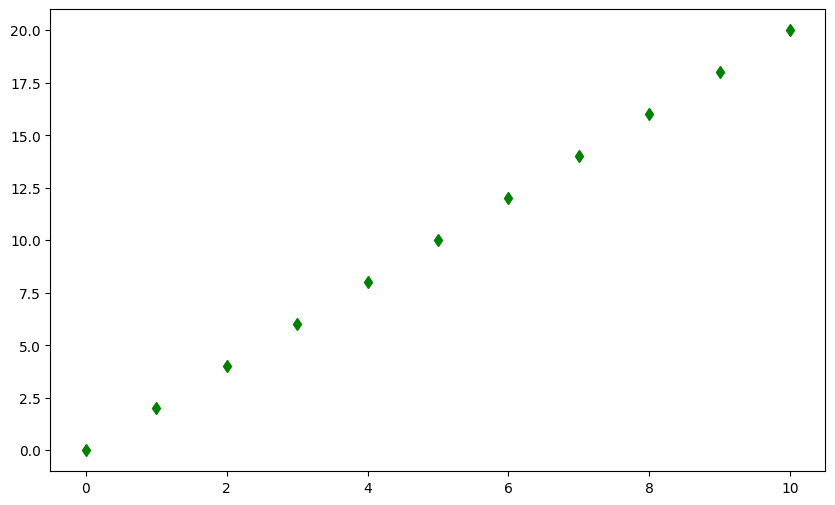

In [ ]:
xs = range(11)
ys = [x*2 for x in xs]
plt.plot(xs, ys, 'dg');

Instead of regular `range` objects, which only allow for integral start/stop/step values, we typically prefer to use the [numpy library](https://numpy.org)'s `arange` and `linspace` functions with matplotlib. `arange` is like `range`, except we can use floating point values for start/stop/step. `linspace` lets us specify start and stop values (both inclusive), and the number of values to return in that interval.

Examples of `arange` and `linspace` calls (note that both functions return numpy arrays, which are iterable and can be passed to `plot`):

In [ ]:
np.arange(0.5, 2.5, 0.1)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4])

Obtain 41 values that are evenly spaced between 10 and 20

In [ ]:
np.linspace(10, 20, 41)

array([10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ,
       12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
       14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 ,
       16.75, 17.  , 17.25, 17.5 , 17.75, 18.  , 18.25, 18.5 , 18.75,
       19.  , 19.25, 19.5 , 19.75, 20.  ])

In [ ]:
np.linspace(1, 100000, 50, dtype=int) # we can specify the data type to coerce values into integers

array([     1,   2041,   4082,   6123,   8164,  10204,  12245,  14286,
        16327,  18368,  20408,  22449,  24490,  26531,  28572,  30612,
        32653,  34694,  36735,  38776,  40816,  42857,  44898,  46939,
        48980,  51020,  53061,  55102,  57143,  59184,  61224,  63265,
        65306,  67347,  69388,  71428,  73469,  75510,  77551,  79592,
        81632,  83673,  85714,  87755,  89796,  91836,  93877,  95918,
        97959, 100000])

`plot` can be called multiple times in the same cell to draw multiple lines in the same chart. Below we use this facility together with `linspace` and a handful of list comprehensions to plot some common runtime complexity bounding functions (more on that soon) over a small interval:

---

# Lab 2-1

Given values of x between 0.1 and 4 in `xs` variable, produce a plot of running time complexity of 6 most important functions (except factorial)

* Plotting Factorial function can get ugly very fast (You can try it!)
* Your plot should include x and y label, a legend, and a title

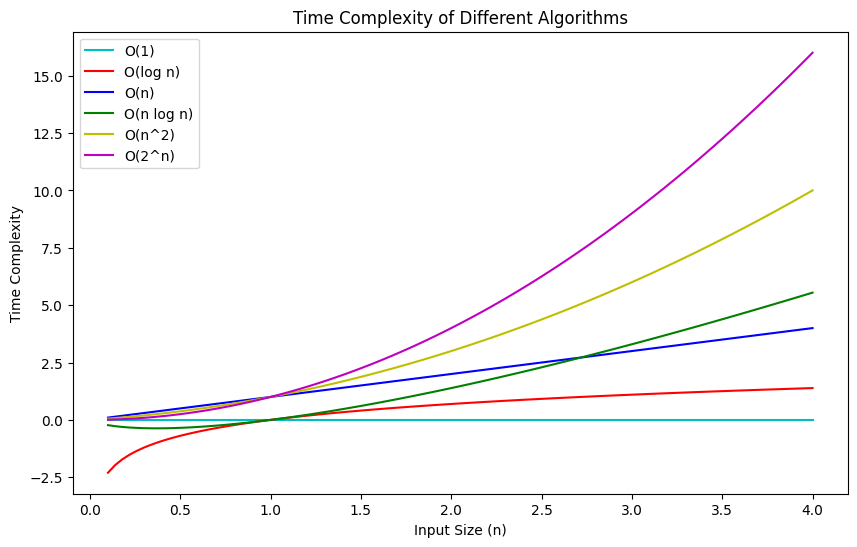

In [ ]:
count = 100
xs = np.linspace(0.1, 4, count)

###################################
# Insert or edit your code here #
ys_const        = [0 for x in xs]
ys_log          = [math.log(x) for x in xs]
ys_linear       = [x for x in xs]
ys_linearithmic = [math.log(x)*x for x in xs]
ys_quadratic    = [x*(x+1)/2 for x in xs]
ys_exponential  = [x**2 for x in xs]
###################################

plt.plot(xs, ys_const, 'c', label='O(1)')
plt.plot(xs, ys_log, 'r', label='O(log n)')
plt.plot(xs, ys_linear, 'b', label='O(n)')
plt.plot(xs, ys_linearithmic, 'g', label='O(n log n)')
plt.plot(xs, ys_quadratic, 'y', label='O(n^2)');
plt.plot(xs, ys_exponential, 'm', label='O(2^n)');

##########################
plt.xlabel('Input Size (n)')
plt.ylabel('Time Complexity')
plt.title('Time Complexity of Different Algorithms')

plt.legend()
##########################

---

## 2. Plotting timings

Plotting timing data collected from functions may help give us a sense of how their runtimes scale with **increasing input sizes**.

#### Good to know

`timeit.timeit` Parameters

In [ ]:
timeit.timeit(stmt='pass', setup='pass', number=1000000, globals=None)

0.01504795099998546

`stmt`: The statement you want to measure, this should be callable or string

`setup`: Setup details that need to be executed before timing begins. Use it to import modules or define variables.

`number`: Is the number of times to execute `stmt`. More iterations provide more stable results by averaging over multiple runs.

`globals`: A dictionary containing global variables to pass to the `stmt` and `setup`.

Text(0.5, 1.0, 'Running time of sum function on 100 rounds')

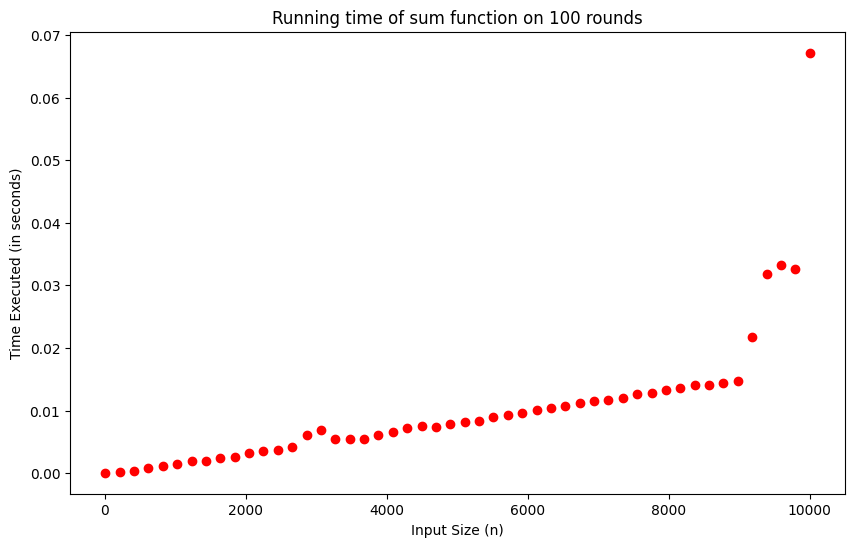

In [ ]:
# runtimes for sum for increasing sizes of input

# 1. Define input sizes
ns = np.linspace(10, 10000, 50, dtype=int)

# 2. Measure execution times
ts = [timeit.timeit(f'sum(range({n}))', number=100)
      for n in ns]

# 3. Plot the results
plt.plot(ns, ts, 'or');
plt.xlabel('Input Size (n)')
plt.ylabel('Time Executed (in seconds)')
plt.title('Running time of sum function on 100 rounds')

**Tips for Accurate Benchmarking**

Increase `number`: Use a large number (e.g., 1000 or more) to reduce noise from external factors.

Measuring Execution Time of a Function `f(n)=n^2`

Text(0.5, 1.0, 'Execution Time of f(n) = n^2')

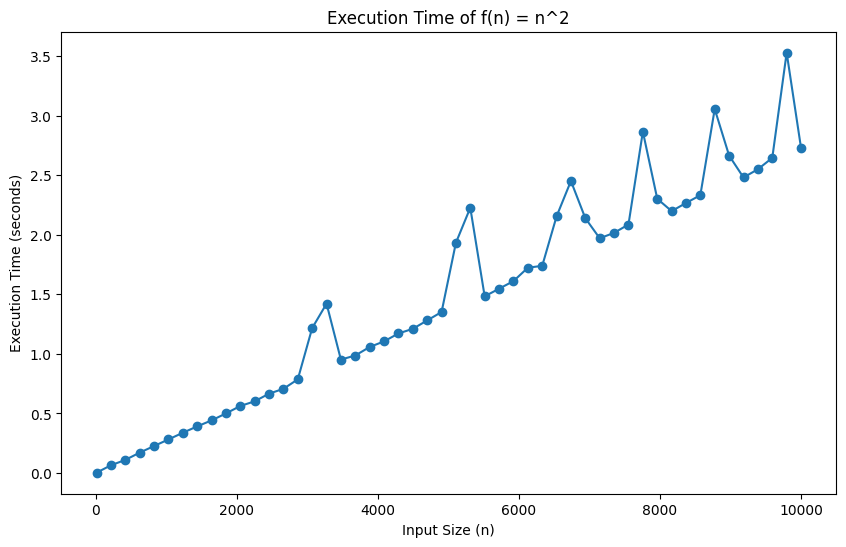

In [16]:
# Define input sizes
ns = np.linspace(10, 10000, 50, dtype=int) # 50 evenly spaced values from 10 to 10000

ts = [timeit.timeit('sum([i**2 for i in range(n)])', setup=f'n={n}', number=1000)
      for n in ns]

plt.plot(ns, ts, '-o', label='Execution Time')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of f(n) = n^2')

Clearly, the runtime of `sum` is directly proportional to the number of values it operates on.

If we assume a linear relationship, we can compute the average slope between adjacent data points to come up with an line of approximate fit that may help us predict the runtime of `sum`.

In [ ]:
total = 0

for i in range(len(ns)-1):
    total += (ts[i+1] - ts[i]) / (ns[i+1] - ns[i]) # recall: slope = rise / run

avg_slope = total / (len(ns)-1)

In [ ]:
avg_slope

We can also use the statistics module to help us compute the mean:

In [ ]:
import statistics
avg_slope = statistics.mean((ts[i+1] - ts[i]) / (ns[i+1] - ns[i]) for i in range(len(ns)-1))
avg_slope

Add the slope line

In [ ]:
plt.plot(ns, ts, 'or')
plt.plot(ns, [avg_slope*n for n in ns], '--b');

---

## 3. Timing Examples

### Built-in list indexing

What is the runtime behavior of list-indexing?

In [ ]:
lst = list(range(1000000))
ns = np.linspace(0, len(lst), 1000, endpoint=False, dtype=int)
ts = [timeit.timeit(f'_ = lst[{n}]',
                    globals=globals(),
                    number=10000)
      for n in ns]

plt.plot(ns, ts, 'or');
plt.xlabel('Input Size (n)')
plt.ylabel('Time Executed (in seconds)')
plt.title('Running time of list-indexing on 10000 rounds')

Observation: accessing an element in a list by index -- *regardless of where in the list the element is located* -- takes a uniform/constant amount of time.

How? **A Python list uses an array as its backing data store.** Every "slot" in this array is a reference (i.e., a fixed-width address) to an object, and to access an element at a particular index, the underlying code:

1. Computes an *offset* into the array by multiplying the index by the size of a reference
2. Adds the computed offset to the *base address* of the array, giving us the address of the reference
3. Accesses the reference and uses it to load the associated element

Each of the steps above can be performed in constant time.

---

# Lab 2-2 Linear Search

## 2.1 Problem Description

Write a function `linear_search` that accepts two inputs: a list and an integer of a target value
* Linear search is a simple searching algorithm that checks each element in a list one by one until the target value is found or the list ends.
* If the target value is found, return True
* Otherwise, it looks at the next index and repeatedly do this until the last element of the list.
    * If a list does not contain a target value, return "Target not found"


## Constraints
- Built-in functions `enumerate()`, `index()`, or `slicing ([:])` are not allowed.
- Use basic loops and indexing only

In [ ]:
def linear_search(lst:list, target:int):

    for i in range(len(lst)):
      if lst[i] == target:
        return True
    return False

#EXAMPLE
lst = [10, 20, 30, 40, 50]
target = 20

result = linear_search(lst, target)
print(result)


Testing your function on a list of 1 to 100 with a random shuffling of their positions

In [ ]:
import random
lst = list(range(100))
random.shuffle(lst)

target = 10
print(f"Searching for {target} in lst: {linear_search(lst, target)}")

NameError: name 'linear_search' is not defined

## 2.2 What is the runtime behavior of searching for an exist target in an unsorted list? Plot the graph to answer this.

* Input size (`n`) grows from 10 to 10000
* Setup the experiment by creating a list from 0 to `n`, then shuffle the list randomly to unsort it.
    * Each test should execute `100` rounds
    * Each round should search for the same target
* Your plot should include x and y label and a title

In [ ]:
ns1 = np.linspace(10, 10000, 100, dtype=int)


ts1 = [timeit.timeit(f"linear_search(lst,0)", setup = f"lst = list(range({n}));random.shuffle(lst)", globals = globals(), number = 100)
      for n in ns1]


plt.plot(ns1, ts1, 'or');
# Add your code on xlabel, ylabel, and title here
plt.xlabel("Input size")
plt.ylabel("Time Complexity")
plt.title("Time Complexity of Searching in an Unsorted List")


NameError: name 'np' is not defined

## 2.3 What is the runtime behavior of searching for a non-exist element in an unsorted list?

* Input size (`n`) grows from 10 to 10000
* Setup the experiment by creating a list from 0 to `n`, then shuffle the list randomly to unsort it.
    * Each test should execute `100` rounds
    * Each round should search for the same target
* Your plot should include x and y label and a title

In [ ]:
ns2 = np.linspace(10, 10000, 100, dtype=int)

ts2 = [timeit.timeit(f"linear_search(lst, -1)", setup=f'lst=list(range({n}));random.shuffle(lst)',globals=globals(),number=100)
for n in ns2]

plt.plot(ns2, ts2, 'or');
plt.xlabel("Input size")
plt.ylabel("Time Complexity")
plt.title("Running time of searching for a non-exist element in an unsorted list")
plt.show()

NameError: name 'np' is not defined

## 2.4 Combine both plot to compare running time

* Combine both plot into a single plot
* Your plot should include x and y label, a legend, and a title

After plotting, have a look between worst-case scenario and average-case

In [ ]:
#Insert your code here
plt.plot(ns1,ts1,'or',label="First function")
plt.plot(ns2,ts2,'ob',label="Second function")
plt.legend(['Element is exist', 'Element is non-exist'])
plt.xlabel("Input size (n)")
plt.ylabel("Time complexity")
plt.title("Runnig Time")
plt.show()

---

# Lab 2-3 Intersect(a, b, c)

## 3.1 Write a function `isIntersect(a, b, c)` with 2 variations where a, b, c are list of length *n*
* Return True if list a, b, and c has a single element that is identical
* Return False otherwise

## Constraints
- Use basic loops and if-else only

## Example Test Case
* isIntersect([50, 20, 80], [40, 30, 20], [20, 70, 90])
    * Return True because 20 exists on all 3 lists
* isIntersect([40, 60, 80, 100], [10, 30, 50, 60], [10, 20, 30, 40])
    * Return False because no any number that exist on all 3 lists

1. This function has an O($n^3$)

In [ ]:
def isIntersect_1(a, b, c):
    #######################
    for i in range(len(a)):
      for j in range(len(b)):
        for k in range(len(c)):
          if a[i] == b[j] == c[k]:
            return True
    return False

    pass


In [ ]:
isIntersect_1([50, 20, 80], [40, 30, 20], [20, 70, 90])

In [ ]:
isIntersect_1([40, 60, 80, 100], [10, 30, 50, 60], [10, 20, 30, 40])

2. This function has an O($n^2$)

In [ ]:
def isIntersect_2(a, b, c):
    #######################
    keep = set(a)
    for i in range(len(b)):
      if b[i] in keep:
        for j in range(len(c)):
          if b[i] == c[j]: return True
    return False


In [ ]:
isIntersect_2([50, 20, 80], [40, 30, 20], [20, 70, 90])

True

In [ ]:
isIntersect_2([40, 60, 80, 100], [10, 30, 50, 60], [10, 20, 30, 40])

How to create a random list of random length within a length of `n` (i.e. between 1 and `n`)

For example,
* In a list, each number is randomly chosen between 1 and 100
    * Any number can appear in the list more than once
* Each list has a random length between 1 and 20.

In [ ]:
a = [random.randint(1,100) for _ in range(random.randint(1,20))]
b = [random.randint(1,100) for _ in range(random.randint(1,20))]
c = [random.randint(1,100) for _ in range(random.randint(1,20))]

print(a)
print(b)
print(c)

## 3.2 Compare running time between isIntersect with O($n^3$) and O($n^2$) on a single plot
* Setup the experiment by creating a, b, and c as a list of random length between 1 and `n` where each element is randomly chosen between 1 and 100.
* Your plot should include x and y label, a legend, and a title
* Each test should execute `100` rounds

In [ ]:
ns3 = np.linspace(10, 1000, 100, dtype=int)
ts3 = [timeit.timeit(f"IsIntersect_1(x,y,z)", setup = f'x = list(random.randint(1, 100) for _ in range(random.randint(1, {n}))); y=list(random.randint(1,100) for _ in range(random.randint(1, {n}))); z=list(random.randint(1,100) for _ in range(random.randint(1, {n})));'
, globals = globals(), numbers=100) for n in ns3]


plt.plot(ns3, ts3, 'or');

ns4 = np.linspace(10, 1000, 100, dtype=int)
ts4 = [timeit.timeit(f"IsIntersect_2(x,y,z)", setup = f'x = list(random.randint(1, 100) for _ in range(random.randint(1, {n}))); y=list(random.randint(1,100) for _ in range(random.randint(1, {n}))); z=list(random.randint(1,100) for _ in range(random.randint(1, {n})));'
, globals = globals(), numbers=100) for n in ns3]

plt.plot(ns4, ts4, 'or');

# Insert your code here
plt.legend(["On^3 and On^2"])
plt.xlabel("Input size")
plt.ylabel("Time Executed (in seconds)")
plt.title("On^3 and On^2 in 100rounds")

---